In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_diabetes

# Import Data

In [3]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target']=diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [4]:
df.target.unique()

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144., 168.,  68.,  49., 245.,
       184., 202., 137.,  85., 131., 283., 129.,  59., 341.,  87.,  65.,
       102., 265., 276., 252.,  90., 100.,  55.,  61.,  92., 259.,  53.,
       190., 142., 155., 225., 104., 182., 128.,  52.,  37., 170.,  71.,
       163., 150., 160., 178.,  48., 270., 111.,  42., 200., 113., 143.,
        51., 210., 134.,  98., 164.,  96., 162., 279.,  83., 302., 198.,
        95., 232.,  81., 246., 297., 258., 229., 275., 281., 173., 180.,
        84., 121., 161.,  99., 109., 115., 268., 274., 158., 107., 103.,
       272., 280., 336., 317., 235.,  60., 174., 126., 288.,  88., 292.,
       197., 186.,  25., 195., 217., 172., 214.,  70., 220., 152.,  47.,
        74., 295., 127., 237.,  64.,  79.,  91., 116.,  86., 122.,  72.,
        39., 196., 222., 277.,  77., 191.,  73., 263., 248., 296.,  78.,
        93., 208., 108., 154., 124.,  67., 257., 26

# Plot

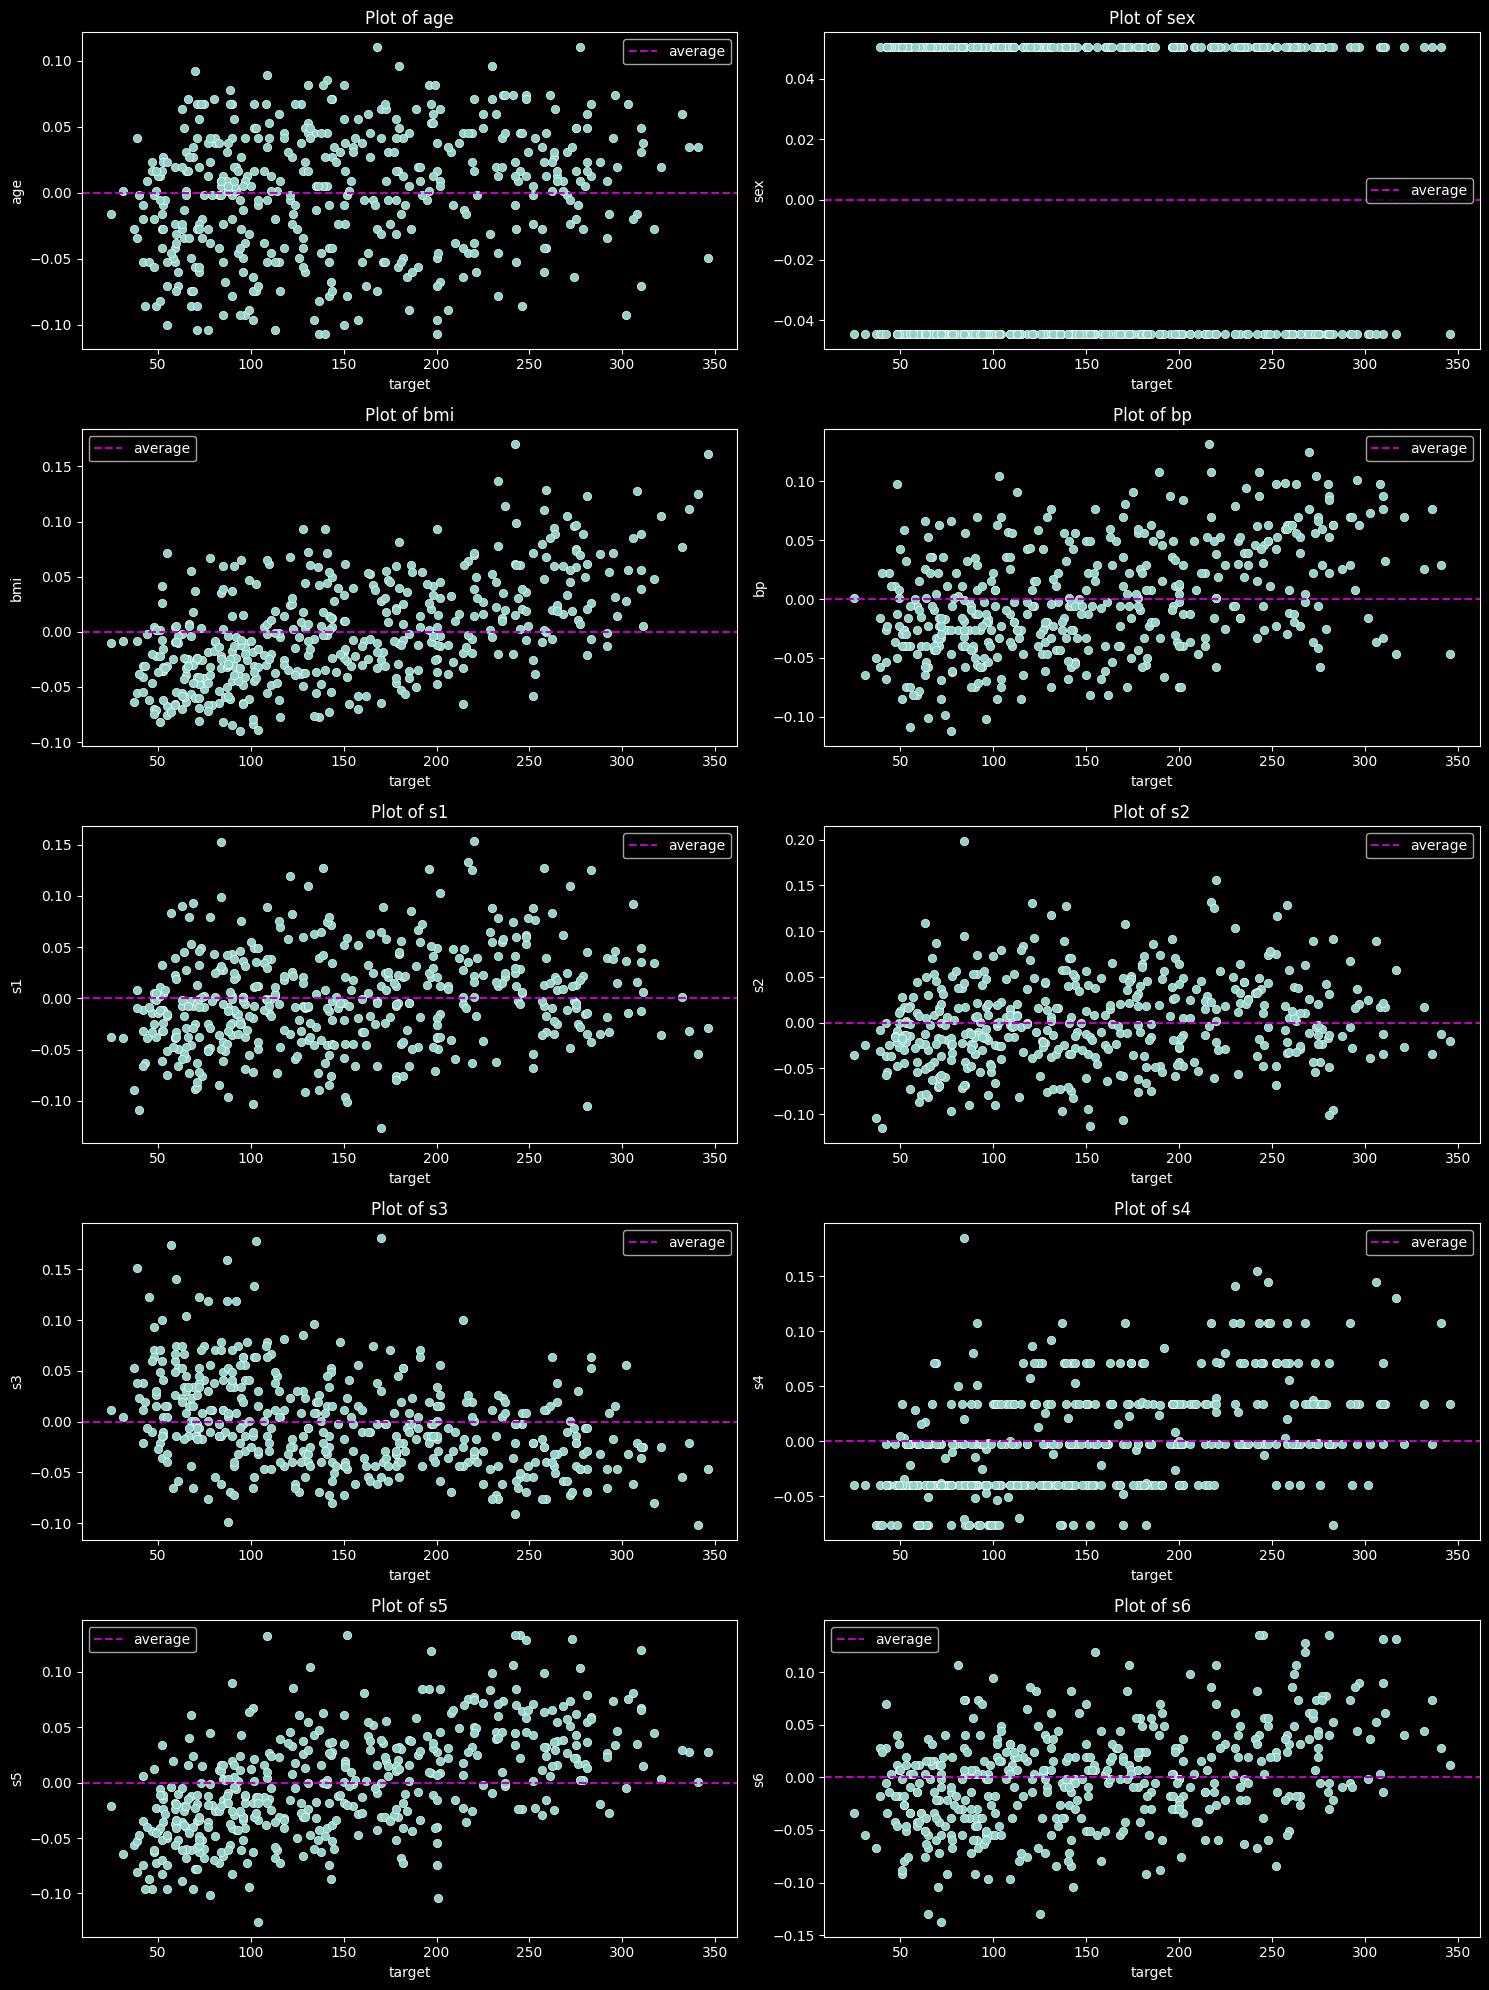

In [5]:
# nrows = df.drop('target',axis=1).shape[1]
nrows = 5
ncols = 2
# plt.figure(figsize=(15,3))
fig, axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,20))

axes = axes.flatten()
for i, ax in enumerate(axes):
    if df.columns[i] != 'target':
        col = df.drop('target',axis=1).columns[i]
        # print(col)
        sns.scatterplot(data=df, x='target', y=col, ax=ax)
        ax.axhline(np.mean(df[col]), linestyle='--', color='m', label='average')
        ax.set_xlabel(f'target')
        ax.set_ylabel(f'{col}')
        ax.set_title(f'Plot of {col}')
        ax.legend()

plt.tight_layout()
plt.show()

# Define GET_COEF()

In [6]:
def get_coef(estimator):
    alphas = [0.1, 0.5, 1]
    res = []
    y_preds = []
    scores = []
    for a in alphas:
        model = estimator(alpha=a)
        model.fit(X_train, y_train)
        y_pred3 = model.predict(X_train)
        score = model.score(X_test, y_test)

        y_preds.append(y_pred3)
        scores.append(score)
        res.append({
            'alpha': a,
            'feature': model.feature_names_in_,
            'coef_list' : model.coef_
        })
    return res, y_preds, scores

# Define Expand_COEF()

In [7]:
def expand_coef(res):
    expanded_data = []

    for item in res:
        alpha = item['alpha']
        feature = item['feature']
        coef_list = item['coef_list']
        
        for index, coef_value in enumerate(coef_list):
            expanded_data.append({'alpha': alpha, 'coef_value': coef_value, 'feature_names': feature[index]})

    # print(expanded_data)
    df_coef = pd.DataFrame(expanded_data).pivot(index = 'feature_names', columns = 'alpha', values='coef_value').add_prefix('alpha_').reset_index()
    # 
    # df_coef.sort_values('alpha_0.1', ascending=False)
    return df_coef

# Define Tree_Importance()

In [8]:
def get_feature_importance(estimator):
    res = []
    scores = []
    model = estimator()
    model.fit(X_train, y_train)

    score = model.score(X_test, y_test)
    scores.append(score)
    res.append({
        # 'feature': model.feature_names_in,
        'feature_important': model.feature_importances_
    })
    return res, scores


# LASSO

In [9]:
from sklearn.linear_model import Lasso, ridge_regression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [10]:
# X = diabetes.data
X= df.drop('target',axis=1)
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape)

(353, 10)


In [11]:
res1, y_preds1, scores1 = get_coef(Lasso)

In [12]:
res1

[{'alpha': 0.1,
  'feature': array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
        dtype=object),
  'coef_list': array([   0.        , -138.10555258,  516.38249076,  277.23268165,
          -25.04583566,   -0.        , -233.73979724,    0.        ,
          455.01923093,   12.37983536])},
 {'alpha': 0.5,
  'feature': array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
        dtype=object),
  'coef_list': array([  0.        ,  -0.        , 456.37353858, 140.3878073 ,
           0.        ,   0.        , -89.39367479,   0.        ,
         392.4603685 ,   0.        ])},
 {'alpha': 1,
  'feature': array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
        dtype=object),
  'coef_list': array([  0.        ,   0.        , 347.55631496,   5.7451883 ,
           0.        ,   0.        ,  -0.        ,   0.        ,
         312.25513397,   0.        ])}]

## Expand COEFT

In [13]:
df_coef_lasso=expand_coef(res1)
df_coef_lasso


alpha,feature_names,alpha_0.1,alpha_0.5,alpha_1.0
0,age,0.000000,0.000000,0.000000
1,bmi,516.382491,456.373539,347.556315
2,bp,277.232682,140.387807,5.745188
3,s1,-25.045836,0.000000,0.000000
4,s2,-0.000000,0.000000,0.000000
5,s3,-233.739797,-89.393675,-0.000000
6,s4,0.000000,0.000000,0.000000
7,s5,455.019231,392.460369,312.255134
8,s6,12.379835,0.000000,0.000000
9,sex,-138.105553,-0.000000,0.000000


<Axes: xlabel='bmi', ylabel='target'>

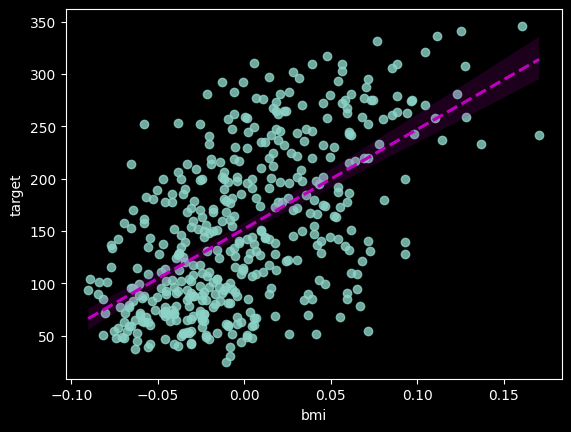

In [14]:
sns.regplot(data=df, x='bmi', y='target', line_kws={'ls':'--', 'color':'m'})

## Plot different alpha LASSO

In [16]:
df1 = X_train[['bmi']]
df1['y_train'] = y_train
df1['y_pred_01'] = y_preds1[0]
df1['y_pred_05'] = y_preds1[1]
df1['y_pred_1'] = y_preds1[2]
df1

C:\Users\84393\AppData\Local\Temp\ipykernel_24124\1680411969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['y_train'] = y_train
C:\Users\84393\AppData\Local\Temp\ipykernel_24124\1680411969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['y_pred_01'] = y_preds1[0]
C:\Users\84393\AppData\Local\Temp\ipykernel_24124\1680411969.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,bmi,y_train,y_pred_01,y_pred_05,y_pred_1
252,0.059541,91.0,180.657000,173.692377,171.456497
416,0.080019,257.0,218.154545,192.553253,171.562408
418,-0.024529,84.0,109.629580,122.573259,137.046551
163,0.072474,131.0,195.591536,187.370702,170.650922
253,0.033673,150.0,197.422740,183.947560,175.040713
...,...,...,...,...,...
369,0.037984,167.0,175.522716,165.750521,163.769375
320,0.030440,122.0,189.526992,179.823065,173.268514
15,-0.018062,171.0,180.978762,172.930449,157.848148
125,-0.008362,161.0,186.164317,182.904425,174.649469


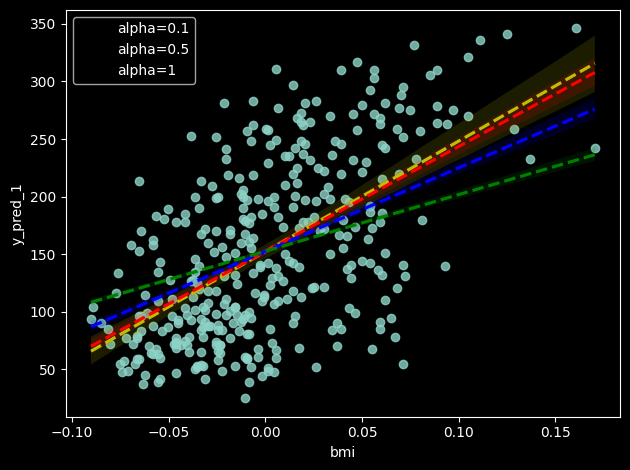

In [17]:
sns.regplot(data= df1, x='bmi', y='y_train', line_kws={'ls':'--', 'color':'y'})
sns.regplot(data= df1, x='bmi', y='y_pred_01', scatter_kws={'s':0}, line_kws={'ls':'--', 'color':'r'}, label='alpha=0.1')
sns.regplot(data= df1, x='bmi', y='y_pred_05', scatter_kws={'s':0}, line_kws={'ls':'--', 'color':'b'}, label='alpha=0.5')
sns.regplot(data= df1, x='bmi', y='y_pred_1', scatter_kws={'s':0}, line_kws={'ls':'--', 'color':'g'}, label='alpha=1')
plt.legend()
plt.tight_layout()
plt.show()

# CONCLUDE: the higher alpha, the sloper the regression

# RIDGE REGRESSION

In [ ]:
# X = diabetes.data
X= df.drop('target',axis=1)
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(X_train.shape)

(353, 10)


In [ ]:
from sklearn.linear_model import Ridge

## Get COEFT

In [ ]:
res2, y_preds2, scores2 = get_coef(Ridge)

In [ ]:
scores2

[0.521125508563446, 0.4740094725534292, 0.42216120115631506]

In [ ]:
df_coef_ridge = expand_coef(res2)
df_coef_ridge.sort_values('alpha_0.1', ascending=False)

alpha,feature_names,alpha_0.1,alpha_0.5,alpha_1.0
1,bmi,477.817350,351.775306,270.562448
7,s5,408.744696,295.736349,233.056422
2,bp,297.971818,230.561061,183.880324
6,s4,138.984280,132.637946,122.382410
8,s6,66.429527,97.006308,98.722698
0,age,11.641529,33.568278,41.374954
3,s1,-66.919341,-4.666188,14.366093
4,s2,-74.465393,-44.400488,-15.649989
9,sex,-185.589083,-105.471988,-60.854055
5,s3,-193.219102,-173.686813,-147.668824


## Plot dif alpha

In [ ]:
df2 = X_train[['bmi']]
df2['y_train'] = y_train
df2['y_pred_01'] = y_preds2[0]
df2['y_pred_05'] = y_preds2[1]
df2['y_pred_1'] = y_preds2[2]
df2

C:\Users\84393\AppData\Local\Temp\ipykernel_23156\3116044507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y_train'] = y_train
C:\Users\84393\AppData\Local\Temp\ipykernel_23156\3116044507.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['y_pred_01'] = y_preds2[0]
C:\Users\84393\AppData\Local\Temp\ipykernel_23156\3116044507.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,bmi,y_train,y_pred_01,y_pred_05,y_pred_1
252,0.059541,91.0,178.322442,172.656361,169.095770
416,0.080019,257.0,220.784749,204.310235,192.934611
418,-0.024529,84.0,105.006881,119.522252,128.685308
163,0.072474,131.0,195.903350,190.071038,184.475987
253,0.033673,150.0,199.175465,195.166694,190.495069
...,...,...,...,...,...
369,0.037984,167.0,178.783311,171.743698,167.014214
320,0.030440,122.0,187.620847,183.531860,180.158873
15,-0.018062,171.0,178.040876,179.761919,179.696803
125,-0.008362,161.0,184.960724,176.553288,171.196072


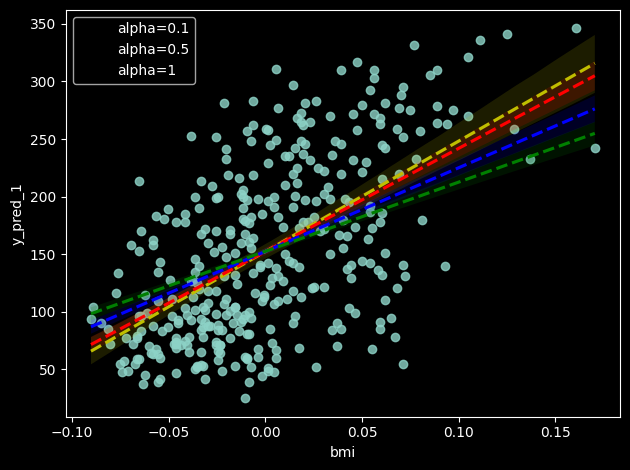

In [ ]:
sns.regplot(data= df2, x='bmi', y='y_train', line_kws={'ls':'--', 'color':'y'})
sns.regplot(data= df2, x='bmi', y='y_pred_01', scatter_kws={'s':0}, line_kws={'ls':'--', 'color':'r'}, label='alpha=0.1')
sns.regplot(data= df2, x='bmi', y='y_pred_05', scatter_kws={'s':0}, line_kws={'ls':'--', 'color':'b'}, label='alpha=0.5')
sns.regplot(data= df2, x='bmi', y='y_pred_1', scatter_kws={'s':0}, line_kws={'ls':'--', 'color':'g'}, label='alpha=1')
plt.legend()
plt.tight_layout()
plt.show()

# ELASTIC NET

In [18]:
def get_coef_eln(estimator):
    alphas = [0.1, 0.5, 1]
    res = []
    y_preds = []
    scores = []
    for a in alphas:
        model = estimator(alpha=a, l1_ratio=0.5, random_state=40)
        model.fit(X_train, y_train)
        y_pred3 = model.predict(X_train)
        score = model.score(X_test, y_test)

        y_preds.append(y_pred3)
        scores.append(score)
        res.append({
            'alpha': a,
            'feature': model.feature_names_in_,
            'coef_list' : model.coef_
        })
    return res, y_preds, scores

In [19]:
# eln = ElasticNet(alpha=a)
res3, y_preds3, scores3 = get_coef_eln(ElasticNet)
res3

[{'alpha': 0.1,
  'feature': array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
        dtype=object),
  'coef_list': array([ 12.25147666,   0.90507147,  35.769107  ,  26.96815759,
          11.14686614,   8.57866793, -25.52952196,  26.84012054,
          35.36785128,  22.29026895])},
 {'alpha': 0.5,
  'feature': array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
        dtype=object),
  'coef_list': array([ 2.1012826 ,  0.        ,  7.04211323,  5.19162651,  1.96799838,
          1.45187183, -4.97206178,  5.41383107,  7.1056032 ,  4.3384811 ])},
 {'alpha': 1,
  'feature': array(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
        dtype=object),
  'coef_list': array([ 0.5832352 ,  0.        ,  3.07003306,  2.13838989,  0.52373987,
          0.26553333, -2.03362384,  2.26812343,  3.11261047,  1.71822967])}]

## Expand coef

In [20]:
# df_coef_ridge.sort_values('alpha_0.1', ascending=False).head(5)
df_coef_lasso.sort_values('alpha_0.1', ascending=False).head(5)

alpha,feature_names,alpha_0.1,alpha_0.5,alpha_1.0
1,bmi,516.382491,456.373539,347.556315
7,s5,455.019231,392.460369,312.255134
2,bp,277.232682,140.387807,5.745188
8,s6,12.379835,0.000000,0.000000
0,age,0.000000,0.000000,0.000000


In [258]:
df_coef_eln = expand_coef(res3)
df_coef_eln.sort_values('alpha_0.1', ascending=False)

alpha,feature_names,alpha_0.1,alpha_0.5,alpha_1.0
1,bmi,35.769107,7.042113,3.070033
7,s5,35.367851,7.105603,3.112610
2,bp,26.968158,5.191627,2.138390
6,s4,26.840121,5.413831,2.268123
8,s6,22.290269,4.338481,1.718230
0,age,12.251477,2.101283,0.583235
3,s1,11.146866,1.967998,0.523740
4,s2,8.578668,1.451872,0.265533
9,sex,0.905071,0.000000,0.000000
5,s3,-25.529522,-4.972062,-2.033624


In [255]:
df3 = X_train[['bmi']]
df3['y_train'] = y_train
df3['y_pred_01'] = y_preds3[0]
df3['y_pred_05'] = y_preds3[1]
df3['y_pred_1'] = y_preds3[2]
df3

C:\Users\84393\AppData\Local\Temp\ipykernel_23156\1753862607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['y_train'] = y_train
C:\Users\84393\AppData\Local\Temp\ipykernel_23156\1753862607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['y_pred_01'] = y_preds3[0]
C:\Users\84393\AppData\Local\Temp\ipykernel_23156\1753862607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

,bmi,y_train,y_pred_01,y_pred_05,y_pred_1
252,0.059541,91.0,155.775191,153.480842,153.136732
416,0.080019,257.0,158.327029,153.977935,153.362920
418,-0.024529,84.0,150.674158,152.440219,152.651615
163,0.072474,131.0,158.242433,153.936960,153.337521
253,0.033673,150.0,160.351674,154.343290,153.457073
...,...,...,...,...,...
369,0.037984,167.0,154.540464,153.257462,153.072729
320,0.030440,122.0,158.663694,154.037911,153.345656
15,-0.018062,171.0,159.836742,154.251788,153.431343
125,-0.008362,161.0,155.317009,153.415078,153.167786


## Plot dif alpha

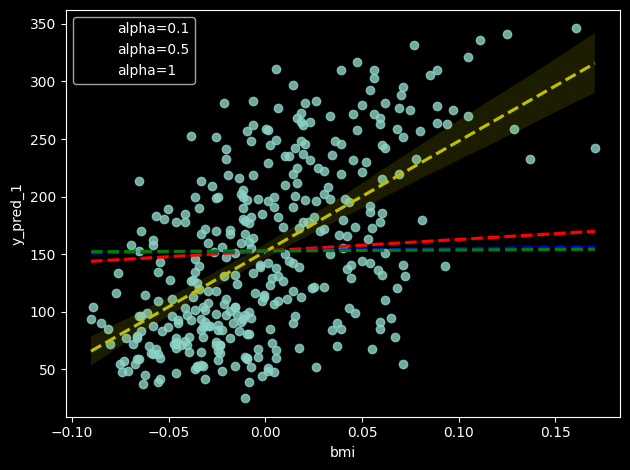

In [256]:
sns.regplot(data= df3, x='bmi', y='y_train', line_kws={'ls':'--', 'color':'y'})
sns.regplot(data= df3, x='bmi', y='y_pred_01', scatter_kws={'s':0}, line_kws={'ls':'--', 'color':'r'}, label='alpha=0.1')
sns.regplot(data= df3, x='bmi', y='y_pred_05', scatter_kws={'s':0}, line_kws={'ls':'--', 'color':'b'}, label='alpha=0.5')
sns.regplot(data= df3, x='bmi', y='y_pred_1', scatter_kws={'s':0}, line_kws={'ls':'--', 'color':'g'}, label='alpha=1')
plt.legend()
plt.tight_layout()
plt.show()

# Decision Tree

In [278]:
from sklearn.tree import DecisionTreeClassifier

In [279]:
res_dt , scores_dt = tree_importance(DecisionTreeClassifier)

In [281]:
print(res_dt)
print(scores_dt)

[{'feature_important': array([0.1149656 , 0.03459471, 0.10891196, 0.1157358 , 0.08959956,
       0.07722765, 0.11352594, 0.05964582, 0.14714633, 0.13864663])}]
[0.02247191011235955]


In [284]:
feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [298]:
def expand_tree_list(res):
    expanded_data = []
    for item in res:
        feature_imp = item['feature_important']

        for index, value in enumerate(feature_imp):
            # print(index, value)
            expanded_data.append({'feature': feature_names[index], 'feature_imp': value})
        df_ = pd.DataFrame(expanded_data)
    return df_       


In [303]:
df_decision = expand_tree_list(res_dt).sort_values('feature_imp', ascending=False)
df_decision

,feature,feature_imp
8,s5,0.147146
9,s6,0.138647
3,bp,0.115736
0,age,0.114966
6,s3,0.113526
2,bmi,0.108912
4,s1,0.089600
5,s2,0.077228
7,s4,0.059646
1,sex,0.034595


<Axes: xlabel='feature', ylabel='feature_imp'>

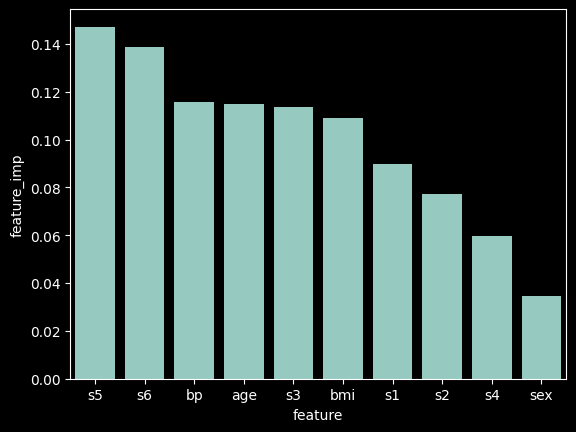

In [301]:
sns.barplot(data=df_decision.sort_values('feature_imp', ascending=False), x='feature', y='feature_imp')

# SVM

In [318]:
from sklearn.svm import LinearSVC

In [337]:
features_svc = []
imp_svc = []
scores_svc = []
svm_clf = LinearSVC()
svm_clf.fit(X_train, y_train)

score = svm_clf.score(X_test, y_test)
scores_svc.append(score)
features_svc = svm_clf.feature_names_in_
imp_svc = svm_clf.coef_
# res_svc.append({
#     'feature': model.feature_names_in_,
#     # 'support_vector': model.support_vectors_,
#     # 'support': model.support_,
#     'coef': model.coef_

# })

In [336]:
imp_svc

array([[-6.71039043e-03, -6.97467602e-02, -2.09610387e-04, ...,
        -3.81172185e-02, -3.74471695e-04, -3.87362697e-02],
       [ 1.30915894e-02, -7.03330614e-02, -7.85641464e-02, ...,
        -7.16925649e-02, -2.04114276e-02, -8.47788097e-02],
       [ 5.81920112e-02,  9.83965785e-02, -1.62523074e-02, ...,
        -1.08643835e-01, -2.28635932e-01,  1.39210150e-01],
       ...,
       [ 3.52239288e-02,  9.68948424e-02,  2.14835364e-01, ...,
        -5.72430227e-02,  5.74908198e-04,  1.20614306e-01],
       [ 4.48248907e-02,  7.33626404e-02,  2.55545116e-01, ...,
         2.24115219e-01, -9.84100301e-02, -5.01522086e-03],
       [-1.17964513e-01, -1.01338214e-01,  3.58343147e-01, ...,
         4.88834894e-02,  3.46467695e-02, -2.61886580e-03]])

In [330]:
def expand_res_svc(res):
    expanded_data = []
    for item in res:
        feature_imp = item['coef']

        for index, value in enumerate(feature_imp):
            # print(index, value)
            expanded_data.append({'feature': feature_names[index], 'feature_imp': value})
        df_ = pd.DataFrame(expanded_data)
    return df_  

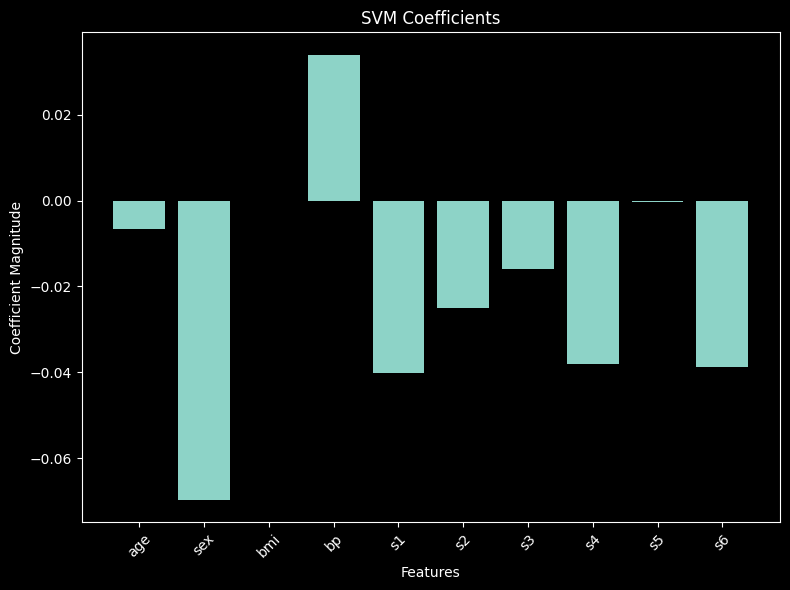

In [340]:
# Plot SVM coefficients (weights)
plt.figure(figsize=(8, 6))
plt.bar(range(len(svm_clf.coef_[0])), svm_clf.coef_[0])
plt.xticks(range(len(svm_clf.coef_[0])), feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Magnitude')
plt.title('SVM Coefficients')
plt.tight_layout()
plt.show()